# Title: Make_ROCcurve
### Author: Mathieu Giguere

Brief: Uses the output of a machine learning model to make a ROC curve.

Preconditions: Needs '{drug}_ML_orthologs_results.csv' and '{drug}_ML_ROCproba.csv'

### Importing modules and packages

In [1]:
import pandas as pd
import numpy as np
np.bool = np.bool_
np.int = np.int_
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import glob
import os

### Define the antifungal drug used.

Choices are : 'caspofungin', 'anidulafungin', 'micafungin'

In [2]:
drug = 'caspofungin'

### Read the ML output file.

In [3]:
df = pd.read_csv(f'{drug}_ML_orthologs_results.csv')

y_test = df['y_test'].tolist()

y_pred = df['y_pred'].tolist()

proba_df = pd.read_csv(f'{drug}_ML_ROCproba.csv')

proba = proba_df['0'].tolist()

### Plot ROC curve

AUC : 0.9136029411764706


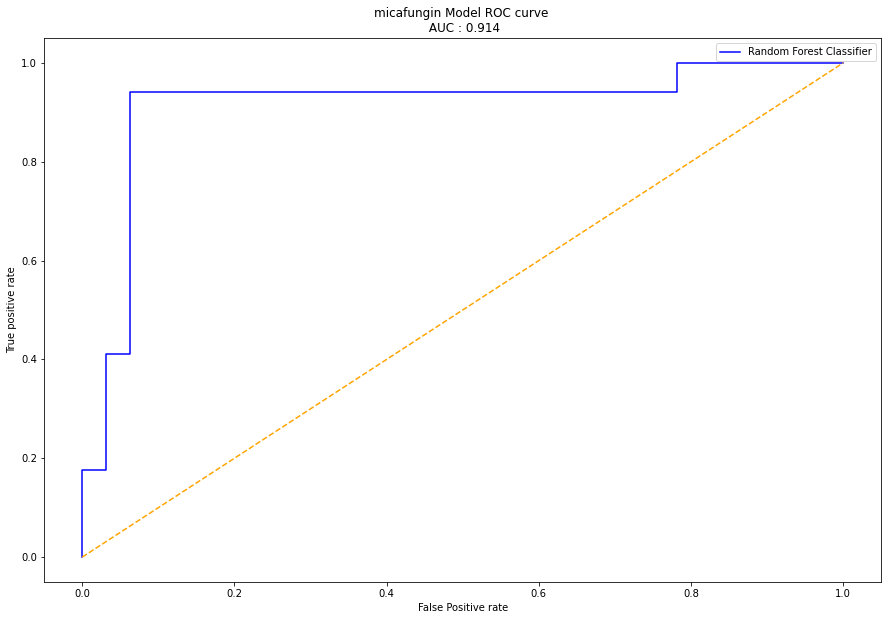

In [4]:
fpr, tpr, thresh = roc_curve(y_test, proba, pos_label='sensitive')
auc_score = roc_auc_score(y_test, proba)
print(f"AUC : {auc_score}")

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, p_thresh = roc_curve(y_test, random_probs, pos_label='sensitive')

# Make ROC curve plot.
plt.figure(figsize=(15, 10))
plt.plot(fpr, tpr, color='blue', label= 'Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='orange')
plt.title(f'{drug} Model ROC curve \n AUC : {auc_score:.3f}')
plt.xlabel('False Positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.tight_layout
plt.savefig(f'{drug}_ROCcurve.svg')
plt.show()